In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:

df = pd.read_csv(r"C:\Users\User\Desktop\GitHub Projeler\E-Ticaret Proje Analysis\data.csv", encoding="windows-1254")


In [130]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [133]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [135]:
df = df.dropna(subset = ['CustomerID'])

In [137]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [139]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [141]:
df.duplicated().any()

True

In [143]:
df = df.drop_duplicates()

In [145]:
df.InvoiceDate = pd.to_datetime(df["InvoiceDate"])   


In [147]:
df.InvoiceNo = pd.to_numeric(df.InvoiceNo)             

In [149]:
df["CustomerID"] = df["CustomerID"].astype("int")

In [151]:
df["Total_Price"] = df["Quantity"] * df["UnitPrice"]

In [153]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [155]:
top10_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

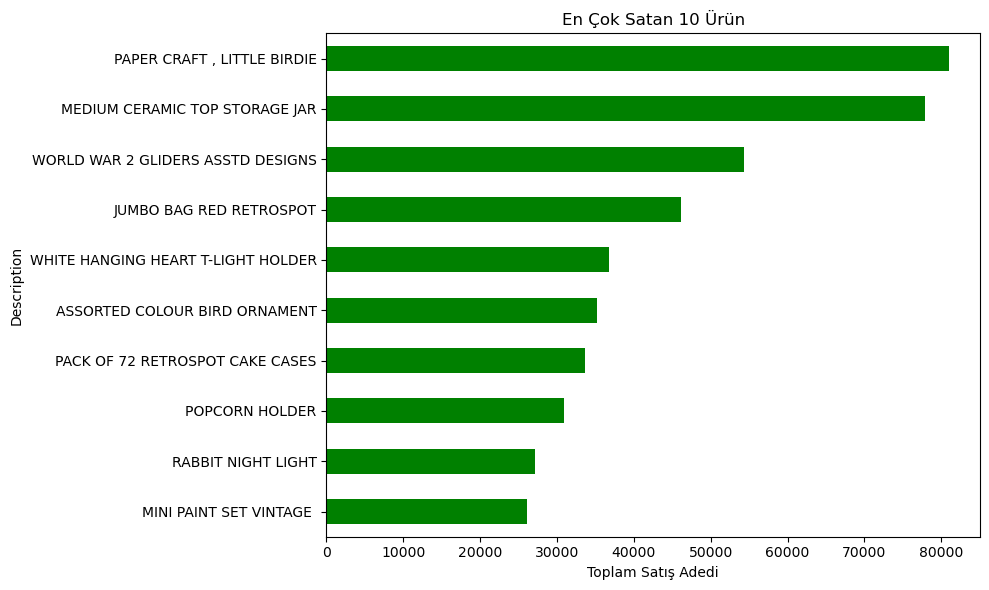

In [169]:
plt.figure(figsize=(10, 6))
top10_product.plot(kind='barh', color = "g")
plt.gca().invert_yaxis()
plt.xlabel('Toplam Satış Adedi')
plt.title('En Çok Satan 10 Ürün')
plt.tight_layout()
plt.show()


In [159]:
top10_total_price = df.groupby('CustomerID')['Total_Price'].sum().sort_values(ascending = False).head(10)

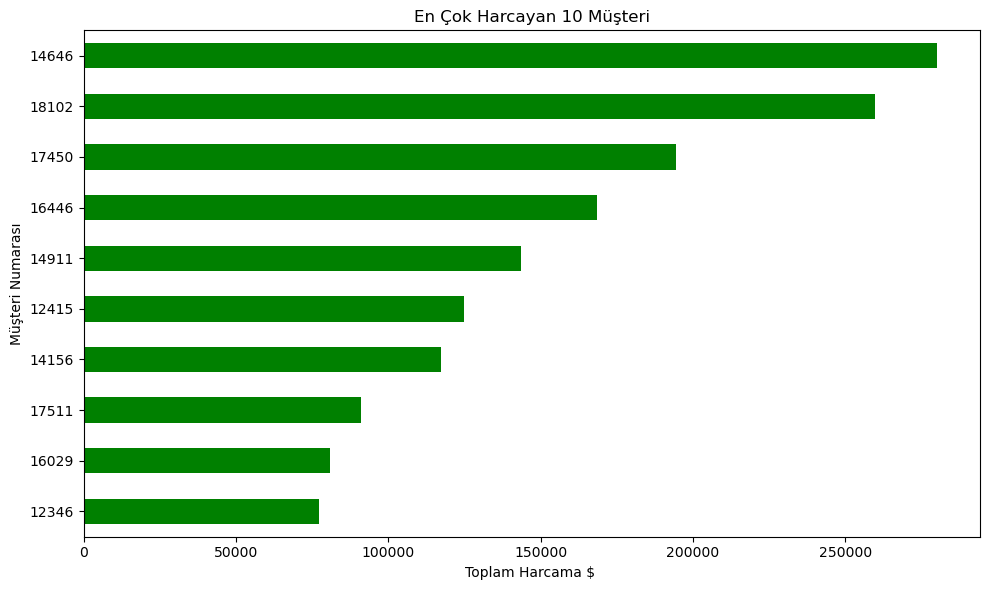

In [171]:
plt.figure(figsize= (10,6))
top10_total_price.plot(kind = "barh", color = "g")
plt.gca().invert_yaxis()
plt.title("En Çok Harcayan 10 Müşteri")
plt.xlabel("Toplam Harcama $ ")
plt.ylabel("Müşteri Numarası")
plt.tight_layout()
plt.show()


In [163]:
top_customers_by_quantity = df.groupby("CustomerID")["Quantity"].sum().sort_values(ascending = False).head(10)

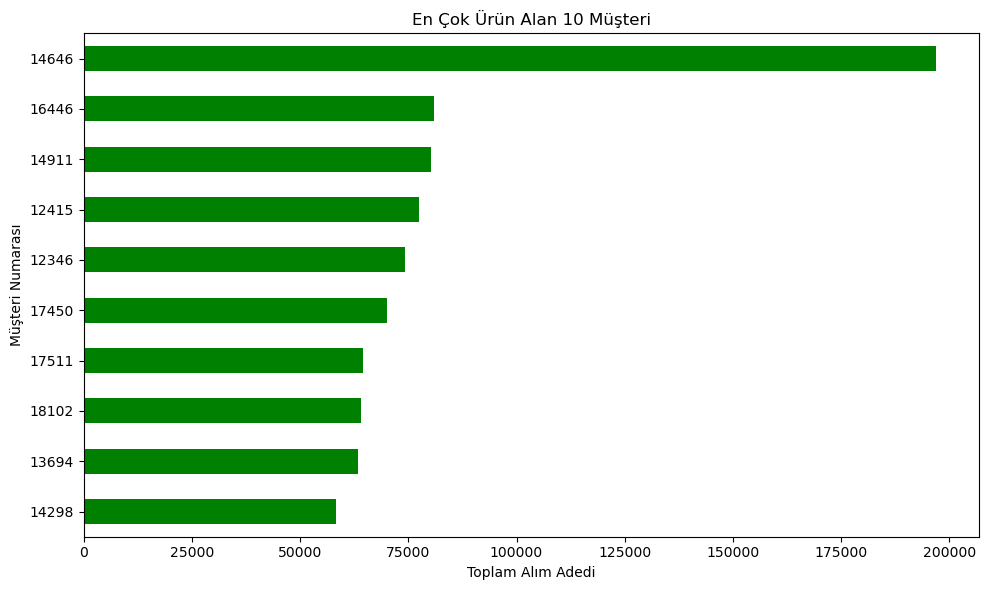

In [165]:
plt.figure(figsize= (10,6))
top_customers_by_quantity.plot(kind = "barh", color = "g")
plt.gca().invert_yaxis()
plt.title("En Çok Ürün Alan 10 Müşteri")
plt.xlabel("Toplam Alım Adedi")
plt.ylabel("Müşteri Numarası")
plt.tight_layout()
plt.show()


In [175]:
monthly_sales = (
    df.groupby('InvoiceMonth')['Total_Price']
    .sum()
    .reset_index()
)


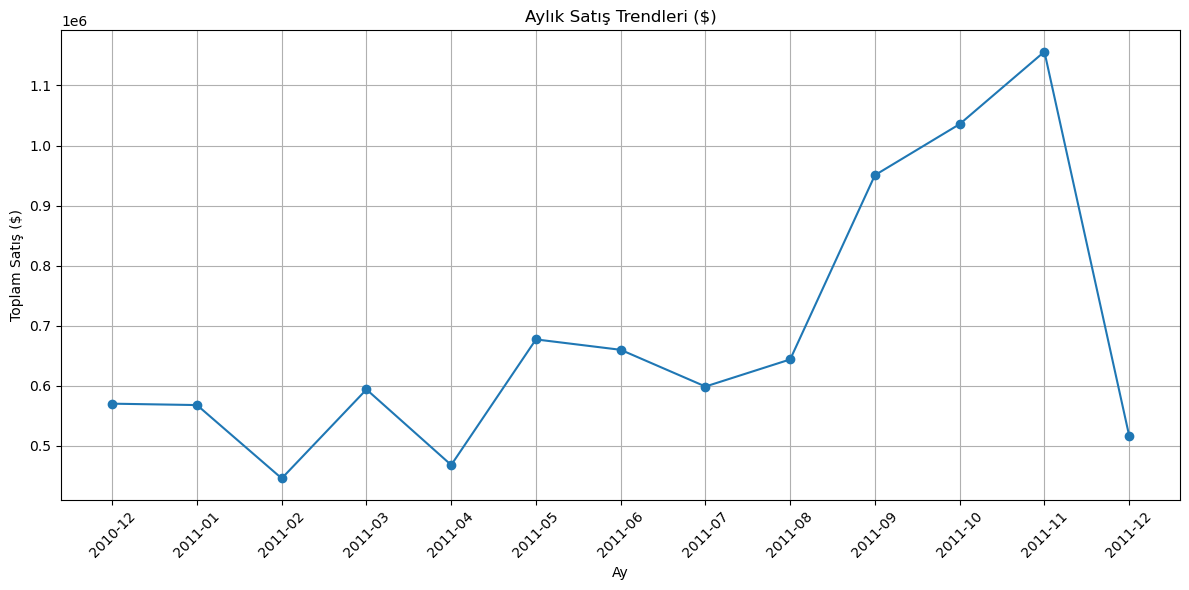

In [179]:

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['InvoiceMonth'].astype(str), monthly_sales['Total_Price'], marker='o')
plt.xticks(rotation=45)
plt.title('Aylık Satış Trendleri ($)')
plt.xlabel('Ay')
plt.ylabel('Toplam Satış ($)')
plt.grid(True)
plt.tight_layout()
plt.show()